In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from models import Dim
from datasets import fifa
import matplotlib.pyplot as plt
from math import floor

In [2]:
# Instantiate dim. red. framework
dim = Dim()

# Load dataset
fifa = fifa()

X_train, X_test, y_train, y_test = train_test_split(fifa.X, fifa.y, test_size=0.1, random_state=33)
dim.col_names = fifa.col_names
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test

dim.new_dim = dict()

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
# Obtain reduced space
dim.apply_dim(num_dim=[5], tflag=[3, 6, 7, 8])

('5Dim', 'LLE', 'k=81-reg=0.001'): 100%|██████████| 1/1 [01:32<00:00, 92.41s/it]


In [3]:
# Apply classifiers
scores = dim.apply_clf()
scores.head(5)

AdaBoost: 100%|██████████| 8/8 [04:53<00:00, 36.68s/it]

saved as 02-09-19:25(.csv)(.xlsx)


,Model,Accuracy,Params,MAE,Dimensions,Dim. Technique,Dim. Params
21,SVM,0.945205,"{'svm__C': 10, 'svm__kernel': 'rbf'}",0.090411,5Dim,LOL,
31,Decision Tree,0.941096,{'dt__max_depth': 5},0.091781,5Dim,LLE,k=81-reg=0.001
23,SVM,0.938356,"{'svm__C': 10, 'svm__kernel': 'rbf'}",0.095890,5Dim,LLE,k=81-reg=0.001
7,XGBoost,0.935616,{'xgb__n_estimators': 50},0.101370,5Dim,LLE,k=81-reg=0.001
47,Random Forest,0.935616,"{'rf__max_depth': 5, 'rf__n_estimators': 50}",0.097260,5Dim,LLE,k=81-reg=0.001


In [4]:
# Get the variability 
weights = dim.get_weights().droplevel(3, axis=1)
weights

5Dim                                                         \
               SLMVP                                PCA      KPCA       LOL   
  Polynomial-Order=5 Linear Radial-Gammas=0.1              Radial             
0                0.2    0.2               0.2  0.512399  0.262235  0.748348   
1                0.2    0.2               0.2  0.291222  0.184473  0.251534   
2                0.2    0.2               0.2  0.122414  0.184454  0.000047   
3                0.2    0.2               0.2  0.050965  0.184421  0.000040   
4                0.2    0.2               0.2  0.023000  0.184417  0.000031   

                            
        LPP            LLE  
        k=5 k=81-reg=0.001  
0  0.003098            0.2  
1  0.240865            0.2  
2  0.245654            0.2  
3  0.253836            0.2  
4  0.256547            0.2

In [3]:
# Unplickle dim
dim.unpickle_dim('/Users/espina/Documents/Education/MSc Data Science/TFM/tfm_code/dim/02-09-19:03.pkl')

In [4]:
# Get the  correlations
corrs = dim.get_corr_table(5, abs=False)


100%|██████████| 8/8 [00:00<00:00, 37.09it/s]


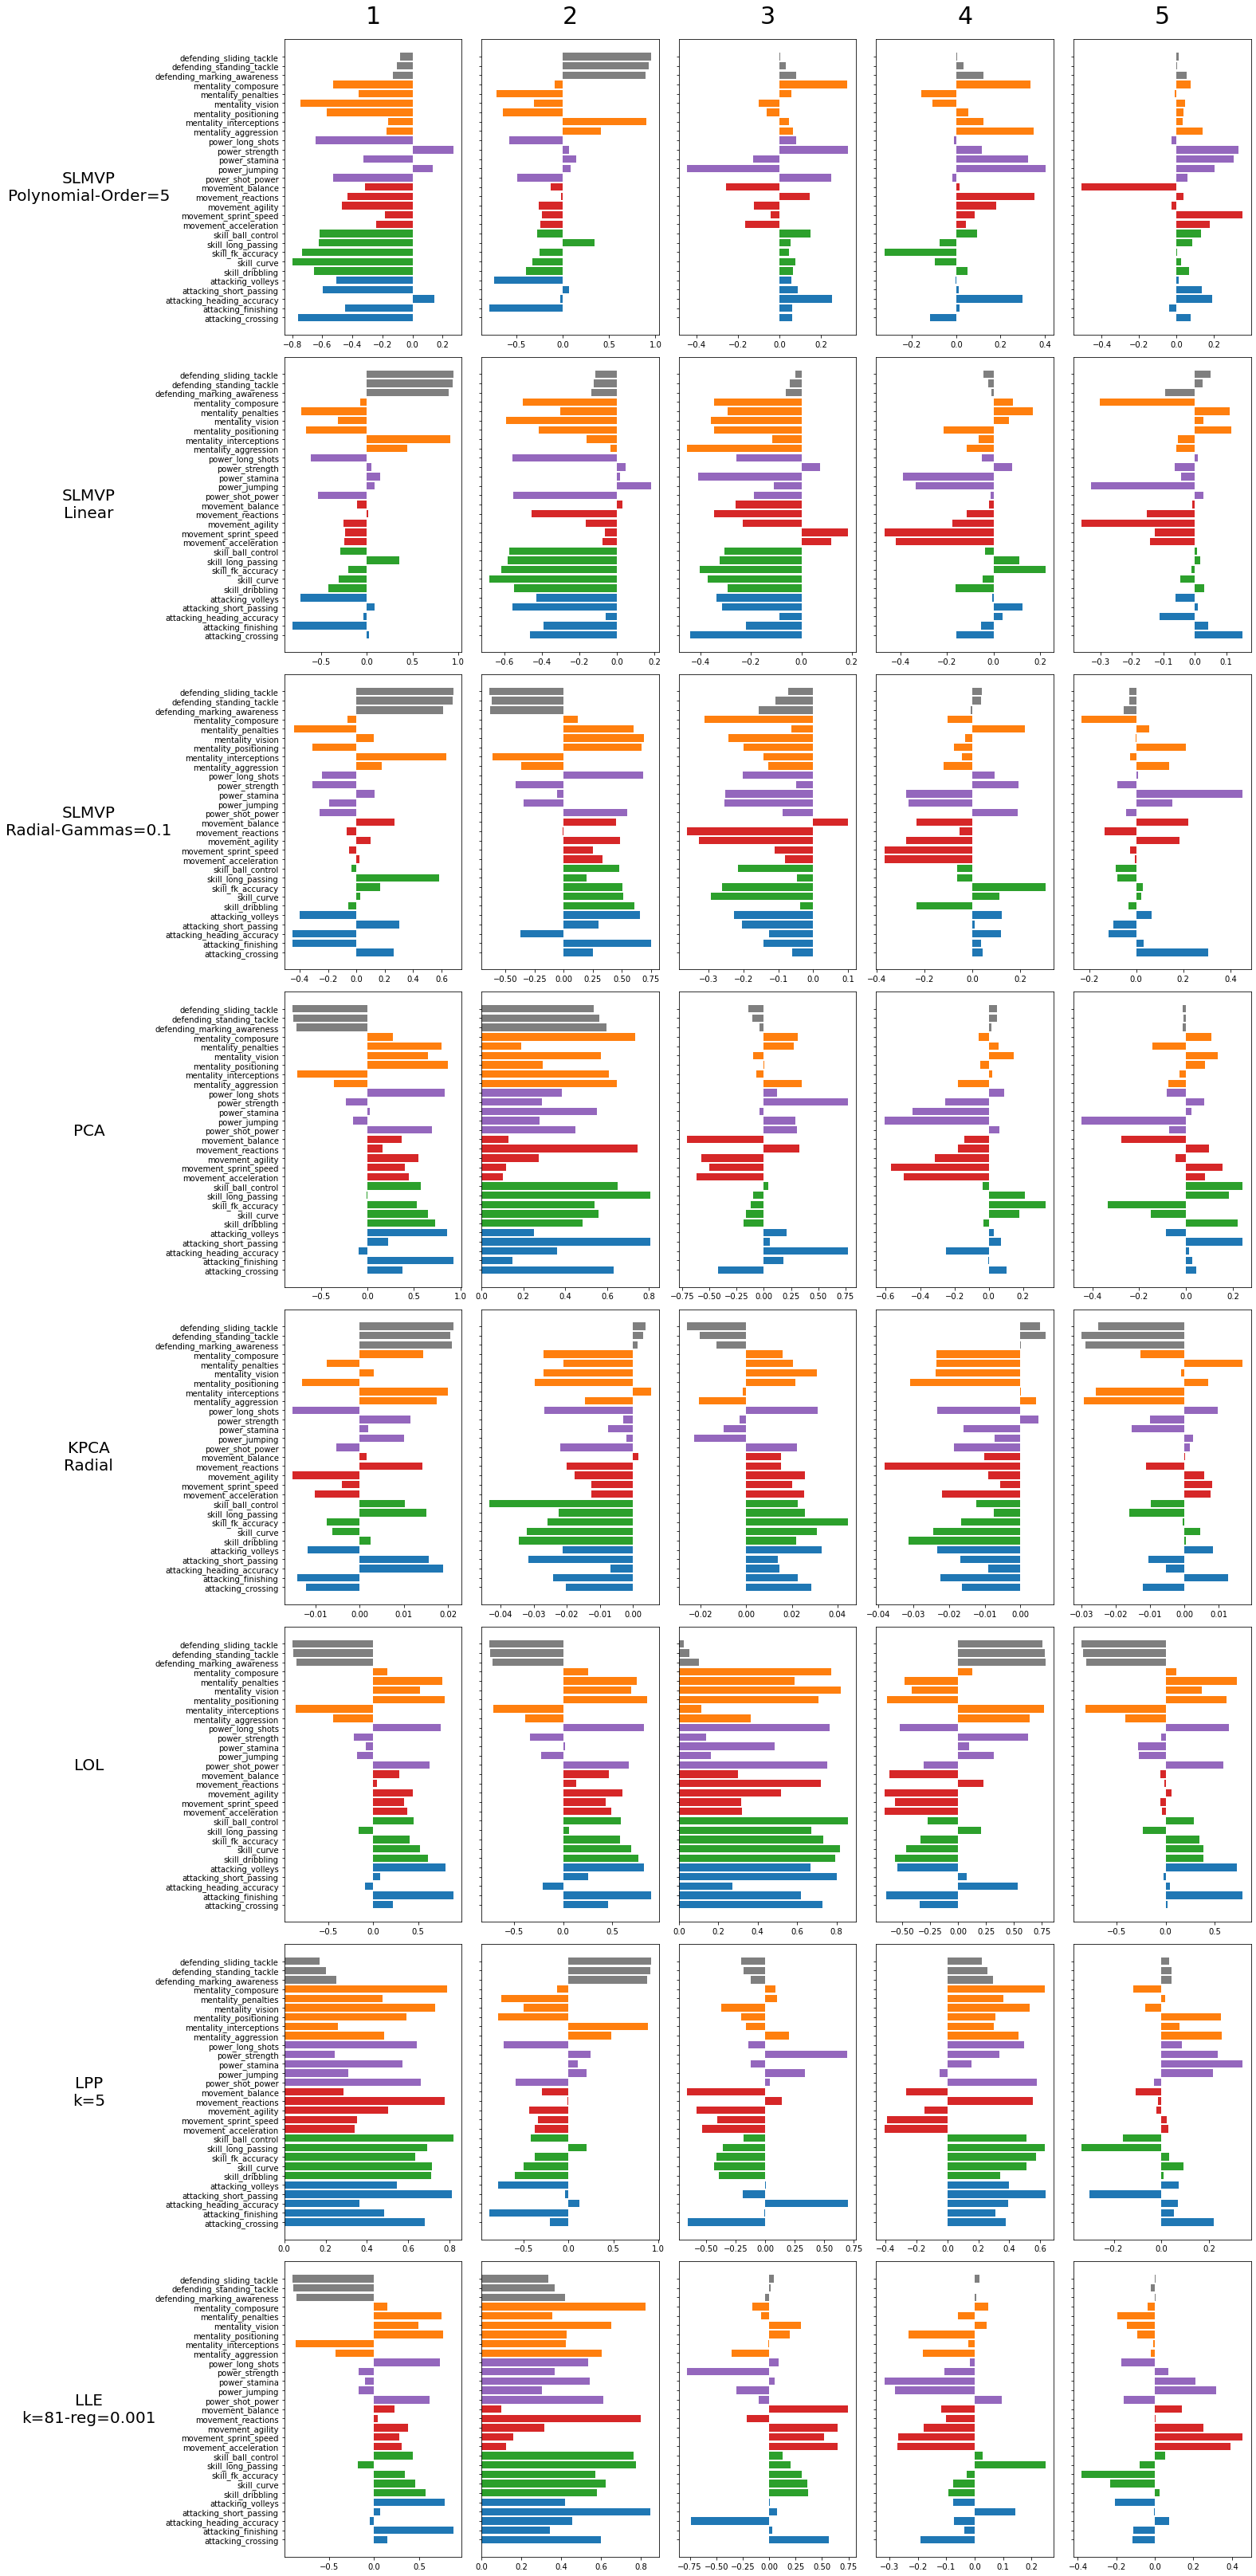

In [74]:
corrs['skill_set'] = corrs.index.to_series().str.split("_").str[0]
colors = corrs['skill_set'].map(
    {'attacking': '#1f77b4',
     'skill': '#2ca02c',
     'movement' : '#d62728',
     'power' : '#9467bd',
     'mentality' : '#ff7f0e',
     'defending' : '#7f7f7f'})

corrs.drop(columns=['skill_set'], inplace=True)



n_rows = 8
n_cols = 5

fig, ax = plt.subplots(
    n_rows, n_cols, figsize=(22, 45), sharey='row')

# Plot
for idx, key_dim in enumerate(list(corrs.keys())):
    values = corrs[key_dim]#.sort_values(ascending=True)
    categories = values.index
    ax[floor(idx/n_cols)][idx % n_cols].barh(categories, values, color=colors)
    #ax[floor(idx/n_cols)][idx % n_cols].set_title(key_dim)
    
# Add column labels
col_labels = ['1', '2', '3', '4', '5']
for ax_, col in zip(ax[0], col_labels):
    ax_.annotate(col, xy=(0.5, 1), xytext=(0, 20),
                xycoords='axes fraction', textcoords='offset points',
                size=30, ha='center', va='baseline')

# Add row lables
row_labels = [x[1] + '\n' + x[2] for x in corrs.keys().to_list()]
row_labels = [x for i, x in enumerate(row_labels) if x not in row_labels[:i]]
for ax_, row in zip(ax[:,0], row_labels):
    ax_.annotate(row, xy=(0, 0.5), xytext=(-ax_.yaxis.labelpad - 75, 0),
                xycoords=ax_.yaxis.label, textcoords='offset points',
                size=20, ha='center', va='center')

    
plt.subplots_adjust(hspace=0.0)  # Adjusting spacing between subplots

plt.tight_layout()
plt.show()